In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

In [62]:
df = pd.read_csv('.//Team Frames//avalanche.csv')
other_csvs = ['.//Team Frames//blackhawks.csv', './/Team Frames//bluejackets.csv', './/Team Frames//blues.csv', './/Team Frames//bruins.csv', './/Team Frames//canadiens.csv',
'.//Team Frames//canucks.csv', './/Team Frames//capitals.csv', './/Team Frames//coyotes.csv', './/Team Frames//devils.csv', './/Team Frames//ducks.csv',
'.//Team Frames//flames.csv', './/Team Frames//flyers.csv', './/Team Frames//goldenknights.csv', './/Team Frames//hurricanes.csv', './/Team Frames//islanders.csv',
'.//Team Frames//jets.csv', './/Team Frames//kings.csv', './/Team Frames//kraken.csv', './/Team Frames//leafs.csv', './/Team Frames//lightning.csv',
'.//Team Frames//oilers.csv', './/Team Frames//panthers.csv', './/Team Frames//penguins.csv', './/Team Frames//predators.csv', './/Team Frames//rangers.csv',
'.//Team Frames//redwings.csv', './/Team Frames//sabres.csv', './/Team Frames//senators.csv', './/Team Frames//sharks.csv', './/Team Frames//stars.csv',
'.//Team Frames//thrashers.csv', './/Team Frames//wild.csv']

for csv in other_csvs:
    temp = pd.read_csv(csv)
    df = pd.concat([df, temp])


df.dropna(inplace=True)
df.reset_index(inplace=True)
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x[0:10], format='%Y/%m/%d'))
df.drop(columns=['points', 'goals_against', 'power_play', 'penalty_kill', 'shots', 'shots_against', 'FOWp', 'index'], inplace=True)
df.tail()

,team,date,goals,opponent,identifier,rolling_points_5,rolling_points_10,rolling_points_20,rolling_goals_5,rolling_goals_10,rolling_ga_5,rolling_ga_10,rolling_pp_5,rolling_pk_5,rolling_shots_5,rolling_sa_5,rolling_fow_5,rolling_ga_sum,rolling_sa_sum,rolling_svp_5
35623,Minnesota Wild,2022-04-22,6,Seattle Kraken,vs,1.65,1.35,1.383333,3.65,3.675,2.55,3.100,18.495,77.760,31.85,30.05,47.305,51.0,601.0,0.915141
35624,Minnesota Wild,2022-04-24,5,Nashville Predators,@,1.75,1.35,1.400000,3.85,3.625,2.40,3.125,21.495,76.925,32.20,30.20,47.790,48.0,604.0,0.920530
35625,Minnesota Wild,2022-04-26,3,Arizona Coyotes,vs,1.75,1.35,1.400000,3.90,3.675,2.50,3.175,21.260,77.425,32.85,30.15,48.140,50.0,603.0,0.917081
35626,Minnesota Wild,2022-04-28,3,Calgary Flames,vs,1.65,1.30,1.366667,3.90,3.650,2.70,3.225,21.260,76.175,33.05,30.35,48.555,54.0,607.0,0.911038
35627,Minnesota Wild,2022-04-29,4,Colorado Avalanche,vs,1.65,1.30,1.366667,3.90,3.600,2.80,3.275,26.260,76.175,32.50,30.60,49.285,56.0,612.0,0.908497


In [63]:
df.rolling_points_5 = df.rolling_points_5 / 2
df.rolling_points_10 = df.rolling_points_10 / 2
df.rolling_points_20 = df.rolling_points_20 / 2
df.rolling_pp_5 = df.rolling_pp_5 / 100
df.rolling_pk_5 = df.rolling_pk_5 / 100
df.rolling_fow_5 = df.rolling_fow_5 / 100

In [64]:
df_home = df[df['identifier'] == 'vs']
df_home.drop(columns=['identifier'], inplace=True)
df_away = df[df['identifier'] == '@']
df_away.drop(columns=['identifier'], inplace=True)

merged_df = pd.merge(df_home, df_away, how='left', left_on=['date', 'opponent'], right_on=['date', 'team'])
merged_df.drop(columns=['opponent_x', 'opponent_y'], inplace=True)
merged_df.head(10)

c:\Users\cbarg\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,team_x,date,goals_x,rolling_points_5_x,rolling_points_10_x,rolling_points_20_x,rolling_goals_5_x,rolling_goals_10_x,rolling_ga_5_x,rolling_ga_10_x,...,rolling_ga_5_y,rolling_ga_10_y,rolling_pp_5_y,rolling_pk_5_y,rolling_shots_5_y,rolling_sa_5_y,rolling_fow_5_y,rolling_ga_sum_y,rolling_sa_sum_y,rolling_svp_5_y
0,Colorado Avalanche,2006-03-02,1,0.725,0.6000,0.600000,3.35,3.400,2.50,3.025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Colorado Avalanche,2006-03-12,3,0.625,0.5875,0.608333,3.00,3.175,2.80,3.000,...,2.10,2.200,0.21845,0.89240,28.80,25.80,0.50760,42.0,516.0,0.918605
2,Colorado Avalanche,2006-03-26,3,0.625,0.6250,0.600000,3.00,3.300,2.65,2.800,...,3.20,3.275,0.15855,0.84725,29.30,25.25,0.51210,64.0,505.0,0.873267
3,Colorado Avalanche,2006-03-28,4,0.625,0.6375,0.591667,3.00,3.275,2.65,2.750,...,2.55,2.650,0.21865,0.82710,32.35,30.35,0.50010,51.0,607.0,0.915980
4,Colorado Avalanche,2006-04-03,4,0.600,0.6375,0.583333,3.05,3.350,2.80,2.875,...,3.20,3.250,0.09520,0.85590,29.70,31.40,0.50010,64.0,628.0,0.898089
5,Colorado Avalanche,2006-04-05,1,0.650,0.6375,0.583333,3.25,3.350,2.80,2.875,...,2.95,2.850,0.17845,0.82455,30.95,27.00,0.47645,59.0,540.0,0.890741
6,Colorado Avalanche,2006-04-08,4,0.600,0.6375,0.583333,3.05,3.300,2.80,2.800,...,3.15,3.200,0.14630,0.83255,27.35,30.45,0.51015,63.0,609.0,0.896552
7,Colorado Avalanche,2006-04-09,2,0.600,0.6375,0.600000,3.15,3.225,2.85,2.750,...,2.75,2.750,0.12810,0.81190,26.90,28.15,0.46615,55.0,563.0,0.902309
8,Colorado Avalanche,2006-04-11,6,0.550,0.6375,0.583333,3.05,3.200,3.05,2.750,...,3.60,3.775,0.17005,0.77520,30.05,31.50,0.48860,72.0,630.0,0.885714
9,Colorado Avalanche,2006-10-04,2,0.525,0.6000,0.583333,3.05,3.125,3.10,2.875,...,2.35,2.675,0.23655,0.88800,27.25,26.65,0.52110,47.0,533.0,0.911820


In [65]:
merged_df['rolling_points_10_div'] = merged_df.rolling_points_10_x / merged_df.rolling_points_10_y
merged_df['rolling_points_20_div'] = merged_df.rolling_points_20_x / merged_df.rolling_points_20_y
merged_df['rolling_goals_5_div'] = merged_df.rolling_goals_5_x / merged_df.rolling_goals_5_y
merged_df['rolling_goals_10_div'] = merged_df.rolling_goals_10_x / merged_df.rolling_goals_10_y
merged_df['rolling_ga_5_div'] = merged_df.rolling_ga_5_y / merged_df.rolling_ga_5_x #reversed so that a higher number means home team is better in that area
merged_df['rolling_ga_10_div'] = merged_df.rolling_ga_10_y / merged_df.rolling_ga_10_x #reversed so that a higher number means home team is better in that area
merged_df['rolling_pp_5_div'] = merged_df.rolling_pp_5_x - merged_df.rolling_pp_5_y
merged_df['rolling_pk_5_div'] = merged_df.rolling_pk_5_x / merged_df.rolling_pk_5_y
merged_df['rolling_shots_5_div'] = merged_df.rolling_shots_5_x / merged_df.rolling_shots_5_y
merged_df['rolling_sa_5_div'] = merged_df.rolling_sa_5_y / merged_df.rolling_sa_5_x #reversed so that a higher number means home team is better in that area
merged_df['rolling_fow_5_div'] = merged_df.rolling_fow_5_x / merged_df.rolling_fow_5_y
merged_df['rolling_svp_5_div'] = merged_df.rolling_svp_5_x / merged_df.rolling_svp_5_y
merged_df['result'] = np.where(merged_df.goals_x > merged_df.goals_y, 1, 0)

merged_df.dropna(inplace=True)

In [66]:
merged_df[['rolling_points_10_div','rolling_points_20_div', 'rolling_goals_5_div', 'rolling_goals_10_div', 'rolling_svp_5_x', 'rolling_svp_5_y',  
'rolling_ga_5_div', 'rolling_ga_10_div', 'rolling_pk_5_div', 'rolling_shots_5_div', 'rolling_sa_5_div', 'rolling_fow_5_div', 'rolling_svp_5_div']].describe()

,rolling_points_10_div,rolling_points_20_div,rolling_goals_5_div,rolling_goals_10_div,rolling_svp_5_x,rolling_svp_5_y,rolling_ga_5_div,rolling_ga_10_div,rolling_pk_5_div,rolling_shots_5_div,rolling_sa_5_div,rolling_fow_5_div,rolling_svp_5_div
count,16528.000000,16528.000000,16528.000000,16528.000000,16528.000000,16528.000000,16528.000000,16528.000000,16528.000000,16528.000000,16528.000000,16528.000000,16528.000000
mean,1.039781,1.031309,1.024595,1.015678,0.907193,0.907340,1.023808,1.016116,1.004684,1.004480,1.005613,1.001547,1.000080
std,0.302596,0.266998,0.235287,0.187527,0.014230,0.014268,0.237587,0.187428,0.098756,0.111507,0.115597,0.072783,0.021948
min,0.295082,0.329545,0.328571,0.485075,0.844358,0.839768,0.333333,0.496183,0.642947,0.609065,0.624806,0.766134,0.916147
25%,0.837209,0.855072,0.860000,0.884615,0.897638,0.897822,0.854545,0.881818,0.937768,0.928237,0.925743,0.952622,0.985100
50%,1.000000,1.000000,1.000000,1.000000,0.907703,0.907994,1.000000,1.000000,0.999011,1.000000,0.998429,0.998733,0.999839
75%,1.190476,1.169231,1.159091,1.127503,0.917160,0.917219,1.166667,1.131001,1.064813,1.074010,1.078021,1.048113,1.014627
max,2.947368,3.035714,2.565217,2.074627,0.956061,0.954614,2.571429,1.882353,1.571728,1.687500,1.541922,1.314888,1.090079


# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

feature_cols = ['rolling_points_20_div', 'rolling_goals_5_div', 'rolling_goals_10_div', 'rolling_svp_5_div',  
'rolling_ga_5_div', 'rolling_ga_10_div', 'rolling_pk_5_div', 'rolling_shots_5_div', 'rolling_sa_5_div', 'rolling_fow_5_div']
X = merged_df[feature_cols]
y = merged_df.result

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

logreg = LogisticRegression()

try:
    logreg.fit(X_train, y_train)
except ValueError:
    mask = logreg.fit(X_train, y_train).isna()
    L = df.loc[mask, 'penalty_kill'].tolist()
    print("Not converted values are: " + ", ".join(L))
y_pred = logreg.predict(X_test)

In [68]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1597,  958],
       [1175, 1229]], dtype=int64)

Text(0.5, 257.44, 'Predicted Label')

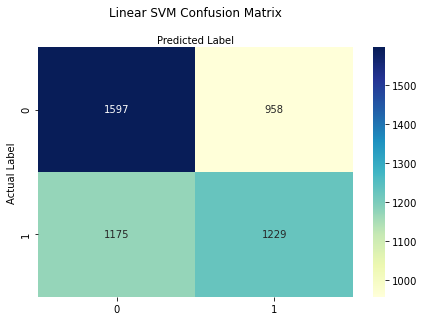

In [69]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Logistic Regression Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [70]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5698729582577132
Precision: 0.5619570187471422
Recall: 0.5112312811980033


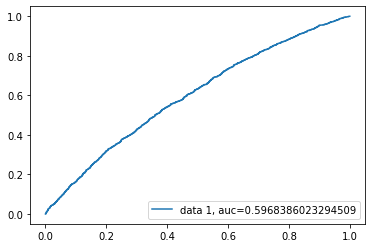

In [71]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random Forest

Text(0.5, 257.44, 'Predicted Label')

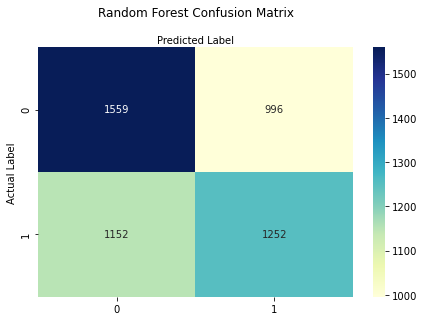

In [72]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=200)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Random Forest Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [73]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5668481548699335
Precision: 0.5569395017793595
Recall: 0.5207986688851913


# SVM

Text(0.5, 257.44, 'Predicted Label')

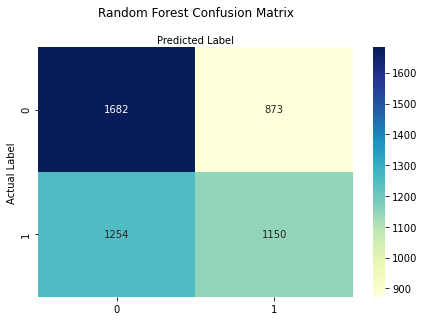

In [74]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Linear SVM Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [75]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5710828796128251
Precision: 0.5684626791893228
Recall: 0.478369384359401
